In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data= pd.read_csv('../input/electric-motor-temperature/pmsm_temperature_data.csv')
data

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245722,0.429853,1.018568,0.836084,0.494725,72
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013417,0.834438,0.494279,72
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666,72
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581,72


# Data Preprocessing

### Making list of elements:

- prof_l- all elements in profile_id column


In [3]:
prof_l=[]
for i in data['profile_id']:
    prof_l.append(i)
# prof_l_min = list(dict.fromkeys(prof_l))
# type(prof_l_min)
len(prof_l)

998070

### Counting the number of times each value repeated 

In [4]:
from collections import Counter

d = dict(Counter(prof_l))

### Making lists of all unique values in profile_id(keys) and their number of occurances(values) 

In [5]:
keys=[]
for i in d.keys():
    keys.append(i)
len(keys)

52

In [6]:
values=[]
for i in d.values():
    values.append(i)
len(values)

52

### Defining a function for data reduction in each profile_id value group 

In [7]:
def data_new(data, n):
    ele= values[n]//8
    K=1
    k=[]
    if n==0:
        ele= 33423//8
        Data=data[0: ele]
    
    else:
        for i in range(0,len(values)+1):
            k.append(values[i])
            if i==n:
                break
            i+= 1
        a= np.sum(k)
        k= k[: len(k) - K] 
        b= np.sum(k)
        Data= data[b: a]
        Data= Data[0: ele]
    return (Data)

### Making a list of labels to represent the groups of reduced data 

In [8]:
data_values=[]
for i in range(0, len(values)+1):
    m= f"data{i}"
    data_values.append(m)
    i+= 1

for i in range(0, len(values)):
    data_values[i]= data_new(data, i)

In [9]:
len(data_values)

53

In [10]:
del data_values[-1]

In [11]:
len(data_values)

52

In [12]:
data_values[51]

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
982770,-0.626002,-0.528386,0.339220,-1.321197,-1.222418,-0.255637,1.029138,-0.245709,-1.630747,-1.188461,-1.450037,-1.505027,72
982771,-0.626477,-0.528384,0.311771,-1.263664,-1.207580,-0.021134,0.921595,0.017990,-1.630811,-1.185941,-1.449785,-1.504933,72
982772,-0.627467,-0.528382,0.209214,-1.169932,-1.159165,0.544006,0.507795,0.591304,-1.630484,-1.184135,-1.450417,-1.504663,72
982773,-0.629191,-0.528381,0.060589,-1.065101,-1.086407,1.016054,0.136077,1.061478,-1.642564,-1.182422,-1.450418,-1.504376,72
982774,-0.632092,-0.528402,-0.116643,-0.949880,-0.995933,1.360879,-0.137493,1.404434,-1.642682,-1.180167,-1.453757,-1.504852,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
984677,-0.616345,1.109477,0.347984,-1.297273,-1.222431,-0.255640,1.029148,-0.245740,-0.592340,0.199869,-0.224141,-0.481272,72
984678,-0.615290,1.112392,0.350784,-1.298513,-1.222429,-0.255640,1.029146,-0.245706,-0.592164,0.200723,-0.224141,-0.481082,72
984679,-0.617394,1.114474,0.348010,-1.297808,-1.222429,-0.255640,1.029156,-0.245703,-0.592288,0.201492,-0.224142,-0.480780,72
984680,-0.619872,1.116487,0.348223,-1.297648,-1.222429,-0.255640,1.029134,-0.245742,-0.593139,0.203687,-0.224031,-0.480910,72


### Concatenating all the groups(the reduced groups) 

In [13]:
frames=[]
for i in range(0, len(data_values)):
    frames.append(data_values[i])
    i+=1
Data = pd.concat(frames)

In [14]:
Data

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
984677,-0.616345,1.109477,0.347984,-1.297273,-1.222431,-0.255640,1.029148,-0.245740,-0.592340,0.199869,-0.224141,-0.481272,72
984678,-0.615290,1.112392,0.350784,-1.298513,-1.222429,-0.255640,1.029146,-0.245706,-0.592164,0.200723,-0.224141,-0.481082,72
984679,-0.617394,1.114474,0.348010,-1.297808,-1.222429,-0.255640,1.029156,-0.245703,-0.592288,0.201492,-0.224142,-0.480780,72
984680,-0.619872,1.116487,0.348223,-1.297648,-1.222429,-0.255640,1.029134,-0.245742,-0.593139,0.203687,-0.224031,-0.480910,72


In [15]:
Data= Data.sample(frac=1)

## Final Training data= Train_Data

## Setting the Target variable 

In [16]:
Target= Data['torque']
Target.head()

567144    1.335199
829843   -0.099317
773618   -0.255640
315195    2.249336
351018    1.625130
Name: torque, dtype: float64

## Deciding Training features, and dropping the rest 

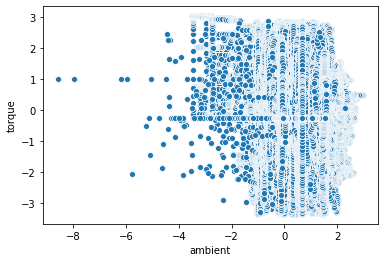

In [17]:
sns.scatterplot(x=data['ambient'], y=data['torque'])

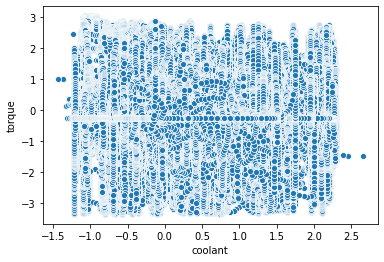

In [18]:
sns.scatterplot(x=data['coolant'], y=data['torque'])

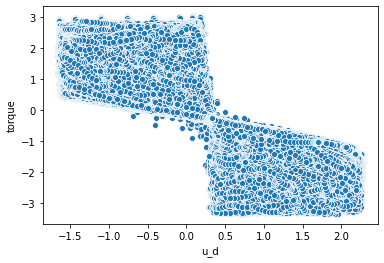

In [19]:
sns.scatterplot(x=data['u_d'], y=data['torque'])

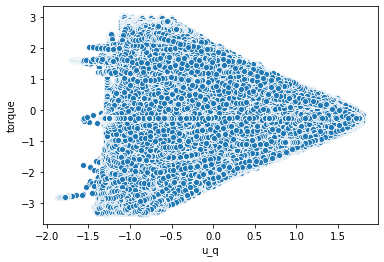

In [20]:
sns.scatterplot(x=data['u_q'], y=data['torque'])

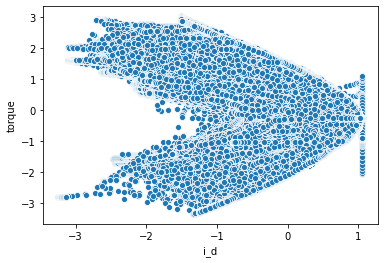

In [21]:
sns.scatterplot(x=data['i_d'], y=data['torque'])

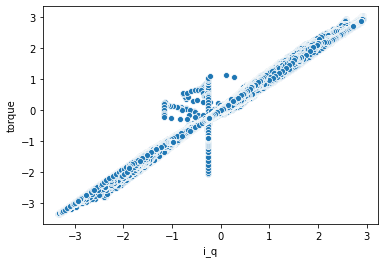

In [22]:
sns.scatterplot(x=data['i_q'], y=data['torque'])

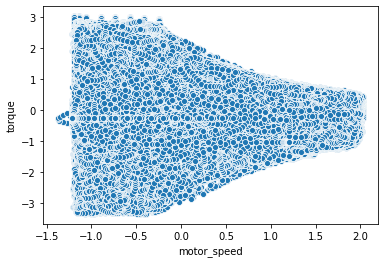

In [23]:
sns.scatterplot(x=data['motor_speed'], y=data['torque'])

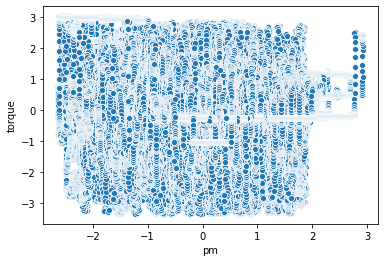

In [24]:
sns.scatterplot(x=data['pm'], y=data['torque'])

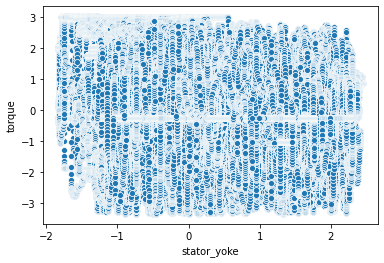

In [25]:
sns.scatterplot(x=data['stator_yoke'], y=data['torque'])

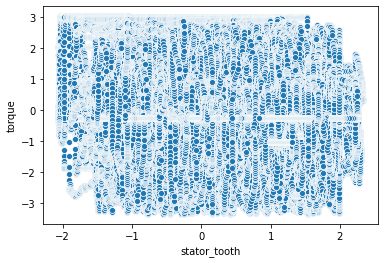

In [26]:
sns.scatterplot(x=data['stator_tooth'], y=data['torque'])

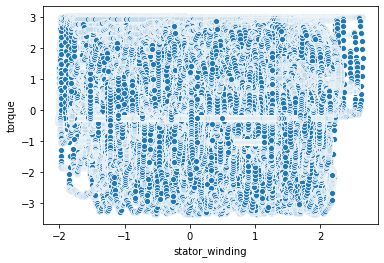

In [27]:
sns.scatterplot(x=data['stator_winding'], y=data['torque'])

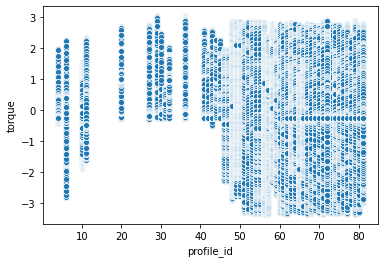

In [28]:
sns.scatterplot(x=data['profile_id'], y=data['torque'])

In [29]:
columns= ['pm','ambient', 'coolant', 'stator_yoke', 'stator_tooth', 'stator_winding', 'torque', 'profile_id']
Train= Data.drop(columns, axis=1)
Train.head(10)

,u_d,u_q,motor_speed,i_d,i_q
567144,-1.597429,-0.656208,0.444039,-1.995214,1.145248
829843,0.020044,1.742477,0.346886,0.924820,-0.070045
773618,0.341574,-1.318295,-1.222433,1.029140,-0.245738
315195,-0.698521,-0.579102,-0.692991,-0.841676,2.288564
351018,-1.355948,0.328073,-0.140239,-0.169086,1.718737
965646,2.109496,-0.393937,-0.224997,-0.824225,-2.867272
238470,-1.607301,-0.639223,-0.004967,-1.984992,1.778206
89688,-0.845463,1.083426,1.519293,-0.931303,0.187694
424535,-1.584394,-0.593597,0.137721,-1.879181,1.477467
141948,0.031197,-0.433418,-0.816608,0.820120,0.486920


## Checking if there is any missing values 

In [30]:
cols_with_missing = [col for col in Train.columns
                     if Train[col].isnull().any()]

cols_with_missing

[]

In [31]:
X_train, X_test, Y_train, Y_test= train_test_split(Train, Target, test_size=0.2, random_state=0)

# Datasets with us:

- X_train
- X_test
- Y_train
- Y_test

# Training data with different models

## Support Vector Regressor 

In [32]:
#Fitting SVR to dataset
from sklearn.svm import SVR
regressor_svm= SVR(kernel= 'rbf')
regressor_svm.fit(X_train,Y_train)


# Predicting a new result
Y_pred_svm= regressor_svm.predict(X_test)
display(Y_pred_svm)

array([2.3405495 , 1.38826763, 0.63175836, ..., 0.33451173, 0.10381866,
       0.01477689])

In [33]:
coefficient_of_dermination_svm = r2_score(Y_test, Y_pred_svm)
print(coefficient_of_dermination_svm)

0.9989100441936122


In [34]:
accu= regressor_svm.score(X_train, Y_train)
print('Accuracy for the trained model is:' + str(accu*100) + '%')

Accuracy for the trained model is:99.89423981805047%


In [35]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_svm})
df.tail(25)

,Actual,Predicted
237314,0.769733,0.722666
770856,-0.255642,-0.268929
427042,0.072266,0.049715
965663,-1.874397,-1.845595
221750,0.684086,0.680479
866116,1.080173,1.035114
511645,-0.756440,-0.802635
35982,0.352136,0.338679
688252,0.532371,0.504506
197851,2.029512,1.933147


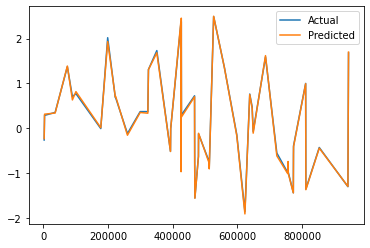

In [36]:
sns.lineplot(data=df['Actual'].iloc[: 50], label="Actual")
sns.lineplot(data=df['Predicted'].iloc[: 50], label="Predicted")

## Random Forest

In [38]:
# Fitting Decision Tree Regression to the Dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rr= RandomForestRegressor(n_estimators=200, random_state= 0) #random estiators= Number of tress
regressor_rr.fit(X_train, Y_train)

Y_pred_rr = regressor_rr.predict(X_test)
print(Y_pred_rr)

[ 2.30663361  1.37088871  0.70353627 ...  0.35002959  0.1223047
 -0.00661296]


In [39]:
coefficient_of_dermination_rr = r2_score(Y_test, Y_pred_rr)
print(coefficient_of_dermination_rr)

0.9999424370531133


In [40]:
accu= regressor_rr.score(X_train, Y_train)
print('Accuracy for the trained model is:' + str(accu*100) + '%')

Accuracy for the trained model is:99.99925163210179%


In [41]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_rr})
df.tail(25)

,Actual,Predicted
237314,0.769733,0.769787
770856,-0.255642,-0.255640
427042,0.072266,0.068526
965663,-1.874397,-1.875415
221750,0.684086,0.683702
866116,1.080173,1.087562
511645,-0.756440,-0.756387
35982,0.352136,0.352073
688252,0.532371,0.535648
197851,2.029512,2.029445


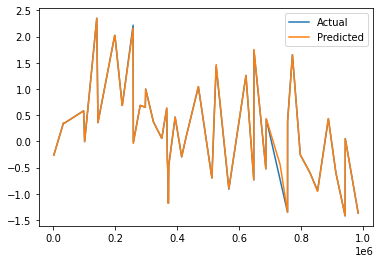

In [42]:
sns.lineplot(data=df['Actual'].iloc[50: 100], label="Actual")
sns.lineplot(data=df['Predicted'].iloc[50: 100], label="Predicted")

## Polynomial Regression 

In [43]:
# Fitting Linear Regression to the Dataset
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [44]:
# Fitting Polynomial Regression to the Dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg= PolynomialFeatures(degree= 4) # Degree can be incresed to make model more closer to real observation
X_poly= poly_reg.fit_transform(X_train)


lin_reg_2= LinearRegression()
lin_reg_2.fit(X_poly, Y_train)


Y_poly_pred= lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [45]:
coefficient_of_dermination = r2_score(Y_test, Y_poly_pred)
print(coefficient_of_dermination)

0.9999010423923403


In [46]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_poly_pred})
df.tail(15)

,Actual,Predicted
941685,-1.073972,-1.081713
414696,-1.109001,-1.108138
414182,0.717714,0.709657
687373,2.217887,2.235376
965741,-1.539024,-1.545273
943227,1.978596,2.041914
811456,-1.544306,-1.546984
686643,0.425664,0.442297
372195,-0.996158,-0.997948
109,-0.266434,-0.269620


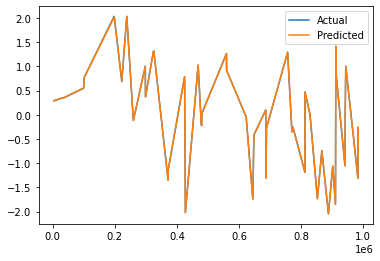

In [47]:
sns.lineplot(data=df['Actual'].iloc[100: 150], label="Actual")
sns.lineplot(data=df['Predicted'].iloc[100: 150], label="Predicted")